<a href="https://colab.research.google.com/github/tc3oliver/StratLabFreq/blob/dev/MACD_Divergence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/StratLabFreq')
os.listdir()

['MACD_Divergence_Analysis.ipynb', 'data', 'TaipeiSansTCBeta-Regular.ttf']

In [6]:
import pandas as pd

In [7]:
dataframe = pd.read_json('./data/BTC_USDT-5m.json')
dataframe.columns=['date', 'open' , 'high', 'low', 'close', 'volume' ]
dataframe['date']=(pd.to_datetime(dataframe['date'],unit='ms'))
dataframe

,date,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061
1,2017-08-17 04:05:00,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:10:00,4261.48,4261.48,4261.48,4261.48,0.000000
3,2017-08-17 04:15:00,4261.48,4264.88,4261.48,4261.48,0.484666
4,2017-08-17 04:20:00,4264.88,4266.29,4264.88,4266.29,2.328570
...,...,...,...,...,...,...
617219,2023-07-06 05:50:00,30549.80,30569.99,30549.80,30563.11,105.865190
617220,2023-07-06 05:55:00,30563.11,30593.64,30563.11,30582.51,71.446400
617221,2023-07-06 06:00:00,30582.50,30599.30,30573.33,30575.48,88.509370
617222,2023-07-06 06:05:00,30575.48,30575.48,30560.00,30570.04,58.483620


In [8]:
!pip install mplfinance

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.font_manager as fm
import matplotlib as mpl

# 下載字體
# !wget https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download -O TaipeiSansTCBeta-Regular.ttf

# 註冊字體
# font_path = 'TaipeiSansTCBeta-Regular.ttf'
# prop = fm.FontProperties(fname=font_path)
# 設定 matplotlib 字體
# mpl.rcParams['font.family'] = prop.get_name()
# font={'font.family': prop.get_name()}
# style=mpf.make_mpf_style(base_mpf_style='default', rc=font)

In [10]:
import random

count = 40

def get_random_count_values_dataframe(df):
    if len(df) < count:
        raise ValueError("DataFrame 中的資料數量不足 40 個")

    start_index = random.randint(0, len(df) - count)

    selected_values = df.iloc[start_index : start_index + count]

    selected_df = pd.DataFrame(selected_values)

    return selected_df

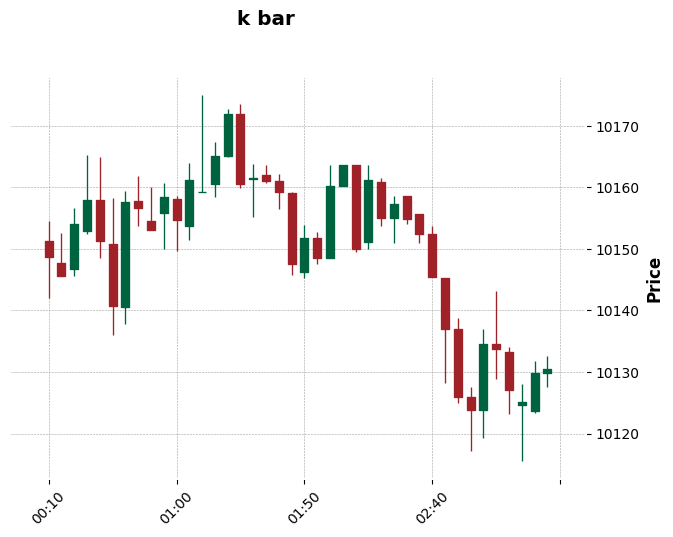

In [13]:
df = get_random_count_values_dataframe(dataframe)

# 將索引設定為 DatetimeIndex
df.set_index('date', inplace=True)

# 繪製 K 線圖
mpf.plot(df, type='candle', style='charles', title='k bar')

# 顯示圖表
plt.show()

In [14]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4295    0  4295    0     0  16045      0 --:--:-- --:--:-- --:--:-- 16026
100  517k  100  517k    0     0   808k      0 --:--:-- --:--:-- --:--:--  808k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4335    0  4335    0     0  12597      0 --:--:-- --:--:-- --:--:-- 12638
100  392k  100  392k    0     0   516k      0 --:--:-- --:--:-- --:--:-- 2282k


In [15]:
import talib.abstract as ta

In [16]:
macd = ta.MACD(dataframe, fastperiod=13, slowperiod=34)
dataframe['macdhist'] = macd['macdhist']

In [121]:
# new
import statistics

# 尋找三個峰值且這些波峰連續升高
def find_peak_sequence(data):
    peaks_index = []
    wave = []

    for i in range(len(data)):
        if i == len(data) - 1:
            break
        d = abs(data[i])
        if len(wave) == 0 or d > wave[-1]:
            wave.append(d)
        else:
            if len(wave) > 1:
                peaks_index.append(i-1)
            wave = [d]

    if len(wave) > 0:
        peaks_index.append(i)

    highlighted_points = [(index, data[index]) for index in peaks_index]

    temp = highlighted_points[-1]

    # new
    if abs(statistics.mean(x[1] for x in highlighted_points[-5:-1])) > abs(temp[-1]):
      return False, []

    highlighted_points = highlighted_points[:-1]

    # new
    highlighted_points = [n for n in highlighted_points if n[1] < 0]

    highlighted_points = sorted(
        highlighted_points, key=lambda x: abs(x[1]), reverse=True)[:2]
    highlighted_points = sorted(
        highlighted_points, key=lambda x: x[0], reverse=False)
    highlighted_points.append(temp)

    if len(highlighted_points) >= 3:
        if abs(highlighted_points[-3][1]) > abs(highlighted_points[-2][1]) > abs(highlighted_points[-1][1]):
                return True, highlighted_points

    return False, []

# 多單條件檢查 零軸以下的 MACD 柱狀體應該大於 windows 的一半
def find_peak_sequence_logn_wrapper(data):
  if data[-1] > 0:
    return False, []
  count = sum(1 for value in data if value < 0)
  if count < (len(data) / 2):
      return False, []
  return find_peak_sequence(data)

In [134]:
import numpy as np

# dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: x[-1] < max(x[:-1]), raw=True)
# dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: x[-1] < x[0], raw=True)
dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: (x[-1] < x[0]) & (x[-1] < max(x[:-1])), raw=True)


[-1.6694088751580765, 0.3452994906250666, 2.4057680007618814, 4.733326086626846, 7.0397352721496205, 9.292167392516678, 9.53648691124478, 9.451618080704986, 9.738183843548914, 9.782871005025235, 10.479483563905472, 11.944171434522682, 12.41995275097116, 11.91919376635146, 9.387809016976568, 5.713203808416523, -0.4888738285691261, -3.841666686473127, -6.236418331647947, -7.089037064470409, -8.580250596467708, -9.317888483966966, -8.16707104801736, -6.680501939178656, -6.376696072940138, -5.313726466809193, -4.287212528764059, -2.1912428606469128, -3.9480788315576696, -5.1846045412835835, -8.485894455109921, -6.86129907544618, -4.619306957242802, -3.3768680926405317, -4.12968357760694, -5.019035573616872, -6.741223884581366, -6.207023262138321, -8.069905866179909, -8.026446886895108]
[(21, -9.317888483966966), (30, -8.485894455109921), (39, -8.026446886895108)]


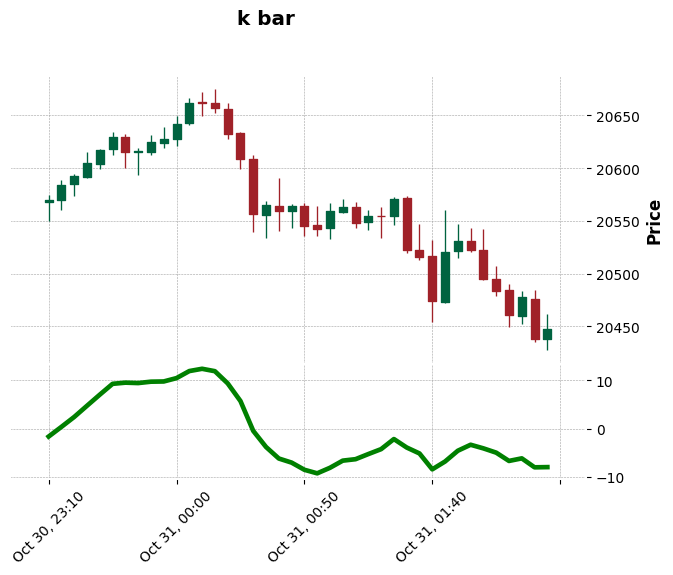

In [138]:
import numpy as np

while True:
  df = get_random_count_values_dataframe(dataframe)
  data = df['macdhist'].values.tolist()

  isfind, l = find_peak_sequence_logn_wrapper(data)


  if isfind:
    print(data)
    print(l)
    if df['is_low_decreasing'].values.tolist()[-1]:
      df.set_index('date', inplace=True)

      # 建立一個 MACD histogram 的圖像
      ap = mpf.make_addplot(df['macdhist'], panel=1, color='g', secondary_y=False)

      # 繪製 K 線圖，並添加 MACD histogram
      mpf.plot(df, type='candle', style='charles', title='k bar', addplot=ap)

      # 顯示圖表
      plt.show()

      break

In [95]:
df = get_random_count_values_dataframe(dataframe)
df.head()

,date,open,high,low,close,volume,macdhist
509002,2022-06-25 10:25:00,21402.50,21416.33,21385.14,21412.07,199.17022,-6.131067
509003,2022-06-25 10:30:00,21412.06,21431.77,21393.83,21401.63,93.31921,-7.756206
509004,2022-06-25 10:35:00,21401.64,21409.43,21394.61,21399.72,83.34190,-8.685226
509005,2022-06-25 10:40:00,21399.71,21432.64,21391.09,21428.95,84.91543,-6.972980
509006,2022-06-25 10:45:00,21428.95,21434.89,21408.73,21410.02,53.65712,-6.920966


In [133]:
import numpy as np

# dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: x[-1] < max(x[:-1]), raw=True)
# dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: x[-1] < x[0], raw=True)
dataframe['is_low_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: (x[-1] < x[0]) & (x[-1] < max(x[:-1])), raw=True)


# Filter the DataFrame where 'is_low_decreasing' is True
filtered_df = dataframe[dataframe['is_low_decreasing'] == True]

# Print the filtered DataFrame
print(filtered_df)

                      date      open      high       low     close     volume  \
45     2017-08-17 07:45:00   4287.41   4287.41   4287.41   4287.41   0.004263   
105    2017-08-17 12:45:00   4430.00   4430.00   4411.00   4411.00   0.699498   
106    2017-08-17 12:50:00   4420.00   4431.13   4411.00   4411.00   0.147476   
107    2017-08-17 12:55:00   4411.00   4411.00   4411.00   4411.00   0.000000   
108    2017-08-17 13:00:00   4411.00   4430.00   4411.00   4430.00   0.610006   
...                    ...       ...       ...       ...       ...        ...   
617211 2023-07-06 05:10:00  30462.37  30462.37  30438.26  30438.27  83.211070   
617212 2023-07-06 05:15:00  30438.26  30460.80  30438.26  30458.45  51.660800   
617213 2023-07-06 05:20:00  30458.44  30464.11  30458.44  30464.11  24.107720   
617214 2023-07-06 05:25:00  30464.10  30480.69  30464.10  30480.69  40.571040   
617215 2023-07-06 05:30:00  30480.69  30499.99  30480.68  30499.99  34.391400   

        macdhist  is_low_de